In [1]:
#check the files
import os
os.listdir()

['test_data.tsv',
 'Flask_folder',
 'VedAstro.Python-main.zip',
 'json_format_corrector.ipynb',
 'site_usage.csv',
 'slack_message.json',
 '.DS_Store',
 'VedAstro.Python-main',
 'tp_zipped_new',
 'TP Gemerator and API caller.ipynb',
 'data.db',
 'tp',
 'Tables.ipynb',
 'Students pass or fail . Avinash.ipynb',
 'stacked_bars_site_and_user_usage.png',
 '.spyproject',
 'Transformers_GPT.ipynb',
 'list_of_tables_v2.txt',
 'message.txt',
 'Flask Json Test Failed.ipynb',
 'Host_flask_server.ipynb',
 '.ipynb_checkpoints',
 'opus-2020-01-08',
 'Slack_message.ipynb',
 'swati.ipynb',
 'tp_zipped',
 'slack_message.txt']

In [2]:
#Read the file
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

df = pd.read_csv('test_data.tsv', sep='\t')

In [3]:
#11 columns have been provided in the data.
df.shape

(5000, 11)

Seems like % of missing values **hours_studied** and **is_note** please too High. 

In [4]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({
                                 'percent_missing': percent_missing})
missing_value_df

,percent_missing
sex,0.00
lang,0.00
country,0.00
age,0.00
first,0.00
last,0.00
hours_studied,39.64
dojo_class,0.00
test_prep,0.00
pass,0.00


In [5]:
# Make a new feature called is_note and fill it with zeros where notes is NaN
df['is_note'] = np.where(pd.isna(df['notes']), 0, 1)

In [6]:
#85% of the data doesn't have any note in it
df.is_note.value_counts(normalize=True)

0    0.8456
1    0.1544
Name: is_note, dtype: float64

In [7]:
#Most spoken language is Japanese follwed by English
df.lang.value_counts(normalize=True)

Japanese    0.8044
English     0.1056
Italian     0.0290
Spanish     0.0264
French      0.0256
Finnish     0.0090
Name: lang, dtype: float64

In [8]:
#Majority of the students have failed the exam
df['pass'].value_counts(normalize=True)

False    0.533
True     0.467
Name: pass, dtype: float64

In [9]:
df.columns

Index(['sex', 'lang', 'country', 'age', 'first', 'last', 'hours_studied',
       'dojo_class', 'test_prep', 'pass', 'notes', 'is_note'],
      dtype='object')

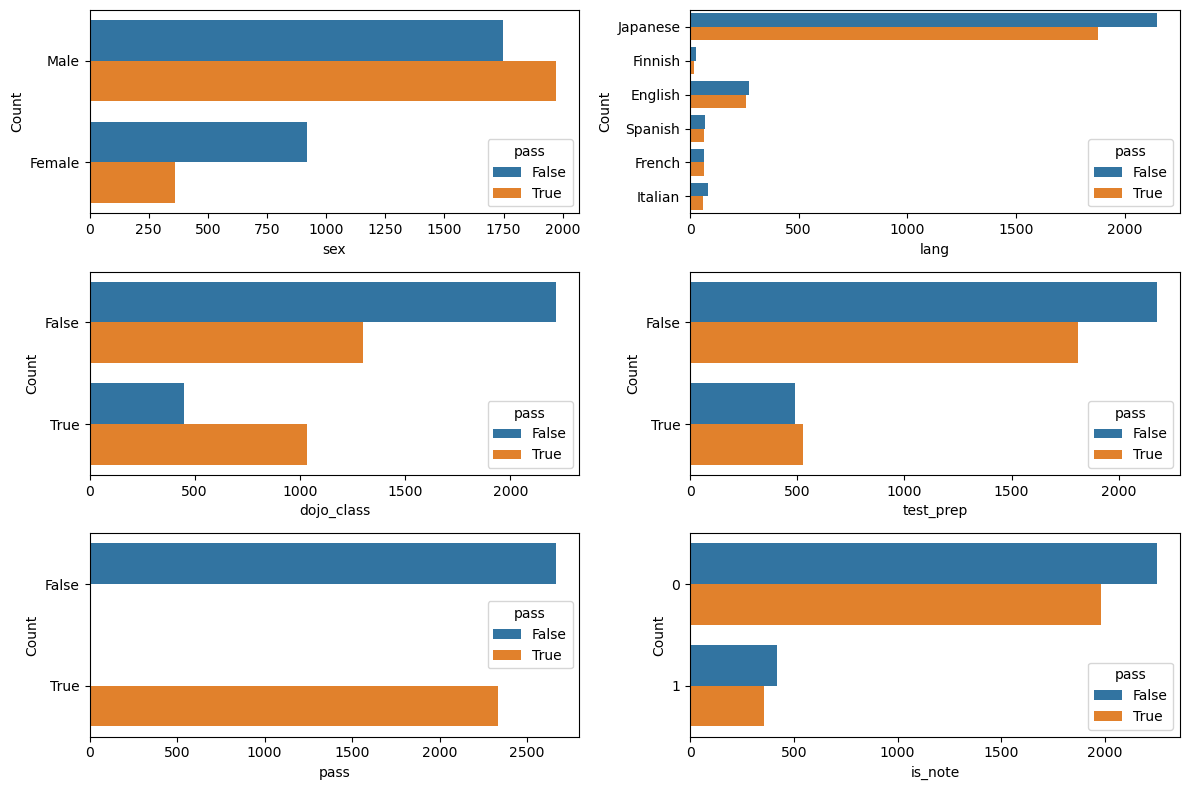

In [10]:
import seaborn as sns
# Calculate the number of rows and columns for subplots
num_rows = 3
num_cols = 2

# Create a figure and subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 8))

# Flatten the axes array
axes = axes.flatten()

# Iterate over each column and draw a countplot
for i, col in enumerate(df[['sex', 'lang',
       'dojo_class', 'test_prep', 'pass', 'is_note']].columns):
    ax = axes[i]
    sns.countplot(data=df, y=col, hue='pass', ax=ax)
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

# Adjust the layout and spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

<Axes: xlabel='age', ylabel='Count'>

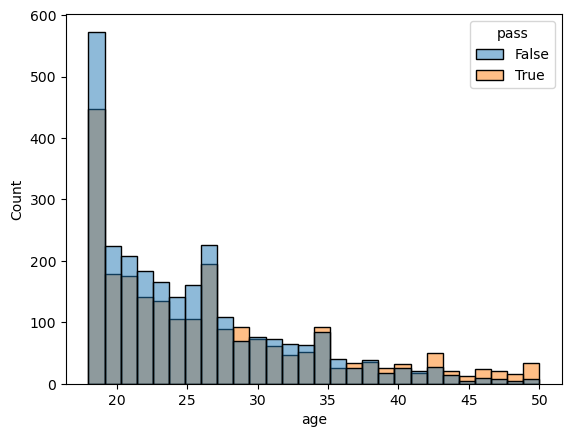

In [11]:
#Evidence that those who have studies longer, have passed 
sns.histplot(data=df, x='age',hue='pass')

<Axes: xlabel='hours_studied', ylabel='Count'>

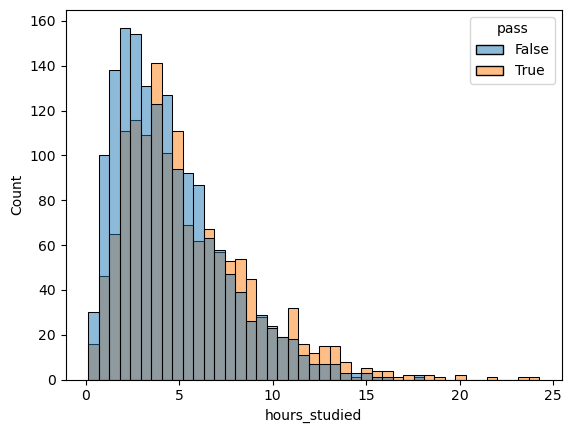

In [12]:
#Evidence that those who have studies longer, have passed 
sns.histplot(data=df, x='hours_studied',hue='pass')

Demographics:
- Looks like males proportion of getting pass is higher than those of females.
- Older students have higher chance of passing the exam
- More than 50% students have failed


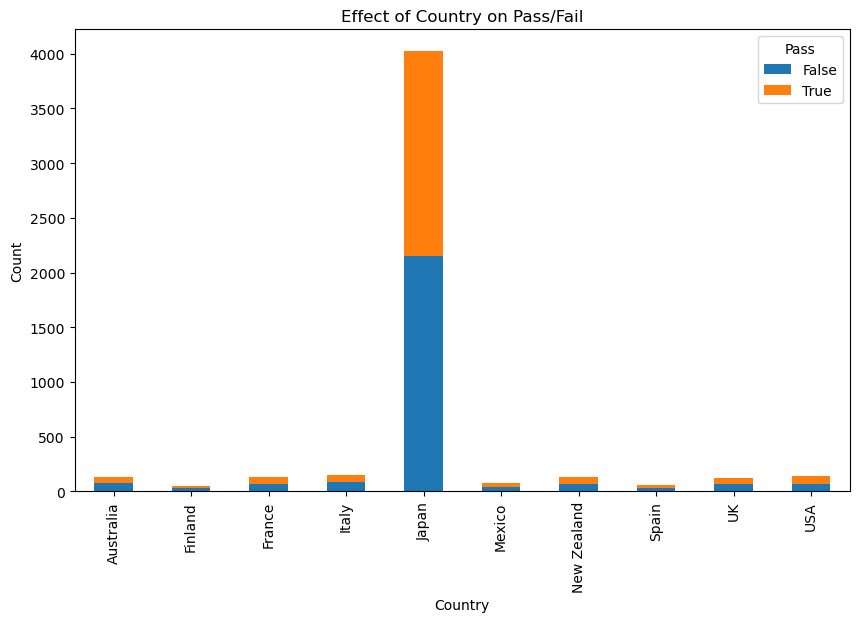

Chi-square test statistic: 5.116298839504643
P-value: 0.8240545914100535


In [13]:
from scipy import stats

# Select relevant columns for analysis
columns_of_interest = ['country', 'pass']
df_selected = df[columns_of_interest].copy()

# Group the data by 'country' and 'pass' and calculate the count
grouped_data = df_selected.groupby(['country', 'pass']).size().reset_index(name='count')

# Pivot the data for visualization
pivot_data = grouped_data.pivot(index='country', columns='pass', values='count')

# Plot a stacked bar plot to visualize the effect of 'country' on 'pass' or 'fail'
pivot_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Effect of Country on Pass/Fail')
plt.legend(title='Pass', loc='upper right')
plt.show()

# Perform chi-square test to assess the association between 'country' and 'pass' variables
cross_tab = pd.crosstab(df['country'], df['pass'])
chi2, p_value, _, _ = stats.chi2_contingency(cross_tab)
print(f"Chi-square test statistic: {chi2}")
print(f"P-value: {p_value}")

#Because p value is less than 0.95, we can conclude that there is no significant association of country and Pass/Fail.

In [14]:
df.columns

Index(['sex', 'lang', 'country', 'age', 'first', 'last', 'hours_studied',
       'dojo_class', 'test_prep', 'pass', 'notes', 'is_note'],
      dtype='object')

###### Check the associations of categorical variables with pass variable

In [15]:
import pandas as pd
from scipy import stats

# Define the list of demographic variables to analyze
demographic_variables = ['sex', 'lang', 'country', 'dojo_class', 'test_prep', 'is_note']

# Iterate over the demographic variables
for variable in demographic_variables:
    # Perform chi-square test to assess the association between the demographic variable and 'pass' variable
    cross_tab = pd.crosstab(df[variable], df['pass'])
    chi2, p_value, _, _ = stats.chi2_contingency(cross_tab)
    
    # Print the results for each demographic variable
    print(f"Demographic Variable: {variable}")
    print(f"Chi-square test statistic: {chi2}")
    print(f"P-value: {p_value}")
    print()


Demographic Variable: sex
Chi-square test statistic: 232.31470630588373
P-value: 1.8644660635947317e-52

Demographic Variable: lang
Chi-square test statistic: 3.8561009764322165
P-value: 0.5703144804818312

Demographic Variable: country
Chi-square test statistic: 5.116298839504643
P-value: 0.8240545914100535

Demographic Variable: dojo_class
Chi-square test statistic: 451.7150999910964
P-value: 3.053964098501853e-100

Demographic Variable: test_prep
Chi-square test statistic: 13.419068892254954
P-value: 0.0002490793016899712

Demographic Variable: is_note
Chi-square test statistic: 0.15533627885208048
P-value: 0.6934871030057566



Based on the chi-square test results for the different demographic variables, here are the findings:

For the 'sex' variable:

The chi-square test statistic is 232.314, indicating a significant deviation from the expected values.
The p-value is very low (1.864e-52), suggesting a strong association between the 'sex' variable and the 'pass' outcome.
For the 'lang' variable:

The chi-square test statistic is 3.856, indicating a slight deviation from the expected values.
The p-value is relatively high (0.570), indicating no significant association between the 'lang' variable and the 'pass' outcome.
For the 'country' variable:

The chi-square test statistic is 5.116, indicating a slight deviation from the expected values.
The p-value is high (0.824), suggesting no significant association between the 'country' variable and the 'pass' outcome.
For the 'dojo_class' variable:

The chi-square test statistic is 451.715, indicating a significant deviation from the expected values.
The p-value is very low (3.054e-100), suggesting a strong association between the 'dojo_class' variable and the 'pass' outcome.
For the 'test_prep' variable:

The chi-square test statistic is 13.419, indicating a significant deviation from the expected values.
The p-value is very low (0.000249), suggesting a strong association between the 'test_prep' variable and the 'pass' outcome.
For the 'is_note' variable:

The chi-square test statistic is 0.155, indicating a slight deviation from the expected values.
The p-value is relatively high (0.693), suggesting no significant association between the 'is_note' variable and the 'pass' outcome.
Based on these results, the 'sex', 'dojo_class', and 'test_prep' variables appear to have a significant association with the 'pass' outcome, while the 'lang', 'country', and 'is_note' variables do not show a significant association.





Regenerate response

In [16]:
#80% of the students chose Japanese, followed by 10% English.
#Taking Dojo classes significantly improves the pass %

###### Check the associations of continous variables with pass variable

In [17]:
from scipy import stats

# Perform t-test for 'age'
t_stat_age, p_value_age = stats.ttest_ind(df[df['pass'] == 1]['age'], df[df['pass'] == 0]['age'])

temp_df = df.dropna()
# Perform t-test for 'hours_studied'
t_stat_hours, p_value_hours = stats.ttest_ind(temp_df[temp_df['pass'] == 1]['hours_studied'], temp_df[temp_df['pass'] == 0]['hours_studied'])

# Print the results for 'age'
print("Variable: age")
print(f"t-test statistic: {t_stat_age}")
print(f"p-value: {p_value_age}")
print()


# Print the results for 'hours_studied'
print("Variable: hour studied")
print(f"t-test statistic: {t_stat_hours}")
print(f"p-value: {p_value_hours}")
print()


from scipy import stats

# Drop missing values in 'hours_studied' column
df_cleaned = df.dropna(subset=['hours_studied'])

# Perform ANOVA test for 'hours_studied'
f_stat, p_value_anova = stats.f_oneway(df_cleaned[df_cleaned['pass'] == 1]['hours_studied'], df_cleaned[df_cleaned['pass'] == 0]['hours_studied'])

# Print the results for 'hours_studied'
print("Variable: hours_studied")
print(f"F-statistic: {f_stat}")
print(f"p-value: {p_value_anova}")
print()


Variable: age
t-test statistic: 7.039925328319929
p-value: 2.183775687785292e-12

Variable: hour studied
t-test statistic: 4.363100626000794
p-value: 1.5728631013044733e-05

Variable: hours_studied
F-statistic: 67.75840780748976
p-value: 2.7186670422254683e-16



t-test for 'age':

This test compares the means of the 'age' variable between the groups of students who passed and those who did not.
We can conclude that there is a statistically significant difference in age between the two groups. Older students may have a higher probability of passing the exam.

t-test for 'hours_studied':

This test compares the means of the 'hours_studied' variable between the groups of students who passed and those who did not. We can conclude that there is a statistically significant difference in hours studied between the two groups. Students who studied more hours may have a higher probability of passing the exam.


ANOVA test for 'hours_studied':

This test compares the means of the 'hours_studied' variable across multiple groups (pass vs. not pass).
The F-statistic (f_stat) measures the ratio of the variability between the groups to the variability within the groups. We can conclude that there is a statistically significant difference in mean hours studied among the groups. Hours studied can be considered an important factor in predicting exam success.


Checking the spread of the Hours_studied and Age features. We see outliers here. 

<Axes: xlabel='hours_studied'>

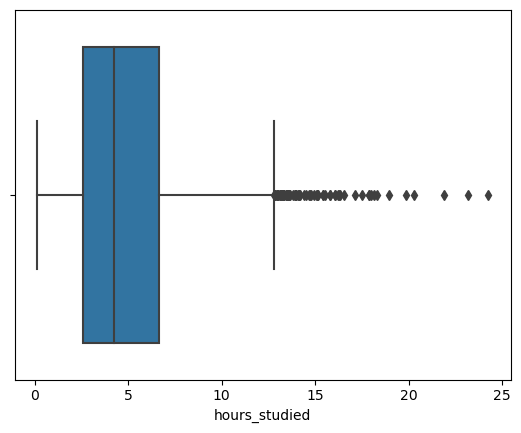

In [18]:
sns.boxplot(data=df, x= 'hours_studied')

<Axes: xlabel='age'>

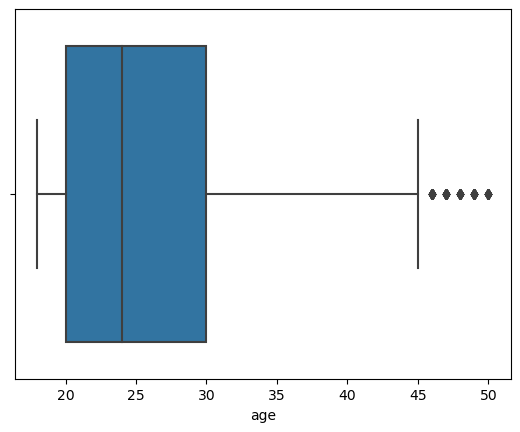

In [19]:
sns.boxplot(data=df, x= 'age',hue='pass')

In [20]:
# Define a function to calculate the percentage of data removed using IQR technique
def percentage_removed_iqr(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    removed_count = len(dataframe[(dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)])
    percentage_removed = (removed_count / len(dataframe)) * 100
    return percentage_removed

# Define a function to calculate the percentage of data removed using 3-sigma technique
def percentage_removed_3sigma(dataframe, column):
    mean = dataframe[column].mean()
    std = dataframe[column].std()
    lower_bound = mean - 3 * std
    upper_bound = mean + 3 * std
    removed_count = len(dataframe[(dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)])
    percentage_removed = (removed_count / len(dataframe)) * 100
    return percentage_removed

# Calculate the percentage of data removed using IQR technique
percentage_removed_iqr_hours = percentage_removed_iqr(df, 'hours_studied')

# Calculate the percentage of data removed using 3-sigma technique
percentage_removed_3sigma_hours = percentage_removed_3sigma(df, 'hours_studied')

# Print the results
print(f"Percentage of data removed using IQR technique: {percentage_removed_iqr_hours}%")
print(f"Percentage of data removed using 3-sigma technique: {percentage_removed_3sigma_hours}%")

# Calculate the percentage of data removed using IQR technique
percentage_removed_iqr_age = percentage_removed_iqr(df, 'age')

# Calculate the percentage of data removed using 3-sigma technique
percentage_removed_3sigma_age = percentage_removed_3sigma(df, 'age')

# Print the results
print(f"Percentage of data removed using IQR technique for age: {percentage_removed_iqr_age}%")
print(f"Percentage of data removed using 3-sigma technique for age: {percentage_removed_3sigma_age}%")


Percentage of data removed using IQR technique: 1.6%
Percentage of data removed using 3-sigma technique: 0.66%
Percentage of data removed using IQR technique for age: 2.46%
Percentage of data removed using 3-sigma technique for age: 1.22%


Let's impute these outliers as NaN.

In [21]:
# Function to fill outliers with NaN and calculate the percentage of data imputed
def fill_outliers_with_nan(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outlier_rows = (dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)
    dataframe.loc[outlier_rows, column] = np.nan
    
    imputed_count = np.sum(outlier_rows)
    percentage_imputed = (imputed_count / len(dataframe)) * 100
    print(f"Volume of data imputed with NaN for {column}: {imputed_count} ({percentage_imputed:.2f}%)")

# Fill outliers with NaN for the 'hours_studied' column and calculate the percentage imputed
fill_outliers_with_nan(df, 'hours_studied')

# Fill outliers with NaN for the 'age' column and calculate the percentage imputed
fill_outliers_with_nan(df, 'age')

Volume of data imputed with NaN for hours_studied: 80 (1.60%)
Volume of data imputed with NaN for age: 123 (2.46%)


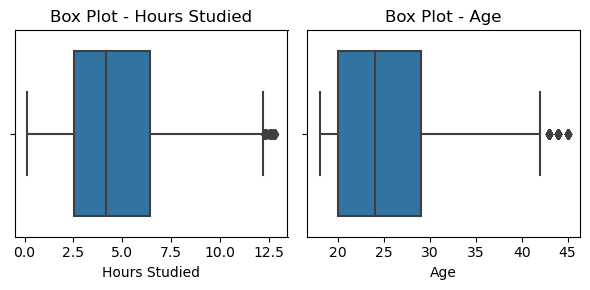

In [22]:
# Set the figure size and create subplots
fig, axes = plt.subplots(1, 2, figsize=(6, 3))

# Create box plot for 'hours_studied'
sns.boxplot(data=df, x='hours_studied', ax=axes[0])
axes[0].set_title('Box Plot - Hours Studied')
axes[0].set_xlabel('Hours Studied')

# Create box plot for 'age'
sns.boxplot(data=df, x='age', ax=axes[1])
axes[1].set_title('Box Plot - Age')
axes[1].set_xlabel('Age')

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

##### Data Wrangling

In [23]:
#Male dominates the group.
df.sex.value_counts(normalize=True)

Male      0.7438
Female    0.2562
Name: sex, dtype: float64

In [24]:
# Define a mapping for True/False to 1/0
mapping = {True: 1, False: 0}

# Convert the categorical variables to 1/0 using map
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})
df['dojo_class'] = df['dojo_class'].map(mapping)
df['test_prep'] = df['test_prep'].map(mapping)
df['pass'] = df['pass'].map(mapping)

In [25]:
df

,sex,lang,country,age,first,last,hours_studied,dojo_class,test_prep,pass,notes,is_note
0,1,Japanese,Japan,20.0,Juurou,Hayashi,10.578594,1,0,1,NaN,0
1,1,Japanese,Japan,22.0,Ryūji,Yamasaki,7.814520,0,0,1,NaN,0
2,1,Japanese,Japan,27.0,Ryūnosuke,Inoue,4.213682,0,0,1,NaN,0
3,1,Japanese,Japan,24.0,Shin,Kobayashi,NaN,0,0,1,NaN,0
4,0,Japanese,Japan,21.0,Ran,Ono,3.248907,0,0,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,Japanese,Japan,29.0,Shirō,Watanabe,3.291721,0,0,1,NaN,0
4996,0,Japanese,Japan,22.0,Aki,Kato,1.590491,0,0,0,NaN,0
4997,1,English,UK,25.0,Ozzy,Haward,5.029988,0,0,0,NaN,0
4998,1,Japanese,Japan,22.0,Sōma,Saitō,1.730570,1,0,1,NaN,0


In [26]:
df = df[['sex', 'lang', 'country', 'age', 'hours_studied',
       'dojo_class', 'test_prep', 'pass', 'is_note']]

In [27]:
# One-hot encoding for 'lang' and 'country'
df_encoded = pd.get_dummies(df, columns=['lang', 'country'])

In [28]:
df_encoded

,sex,age,hours_studied,dojo_class,test_prep,pass,is_note,lang_English,lang_Finnish,lang_French,...,country_Australia,country_Finland,country_France,country_Italy,country_Japan,country_Mexico,country_New Zealand,country_Spain,country_UK,country_USA
0,1,20.0,10.578594,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,22.0,7.814520,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,27.0,4.213682,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,24.0,NaN,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,21.0,3.248907,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,29.0,3.291721,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4996,0,22.0,1.590491,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4997,1,25.0,5.029988,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4998,1,22.0,1.730570,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [29]:
df_encoded = df_encoded[['sex', 'age', 'hours_studied', 'dojo_class',
       'test_prep', 'pass', 'is_note', 'lang_English', 'lang_Finnish',
       'lang_French', 'lang_Italian', 'lang_Japanese', 'lang_Spanish',
       'country_Australia', 'country_Finland', 'country_France',
       'country_Italy', 'country_Japan', 'country_Mexico',
       'country_New Zealand', 'country_Spain', 'country_UK', 'country_USA']]

In [30]:
df = df_encoded.copy()

<Axes: >

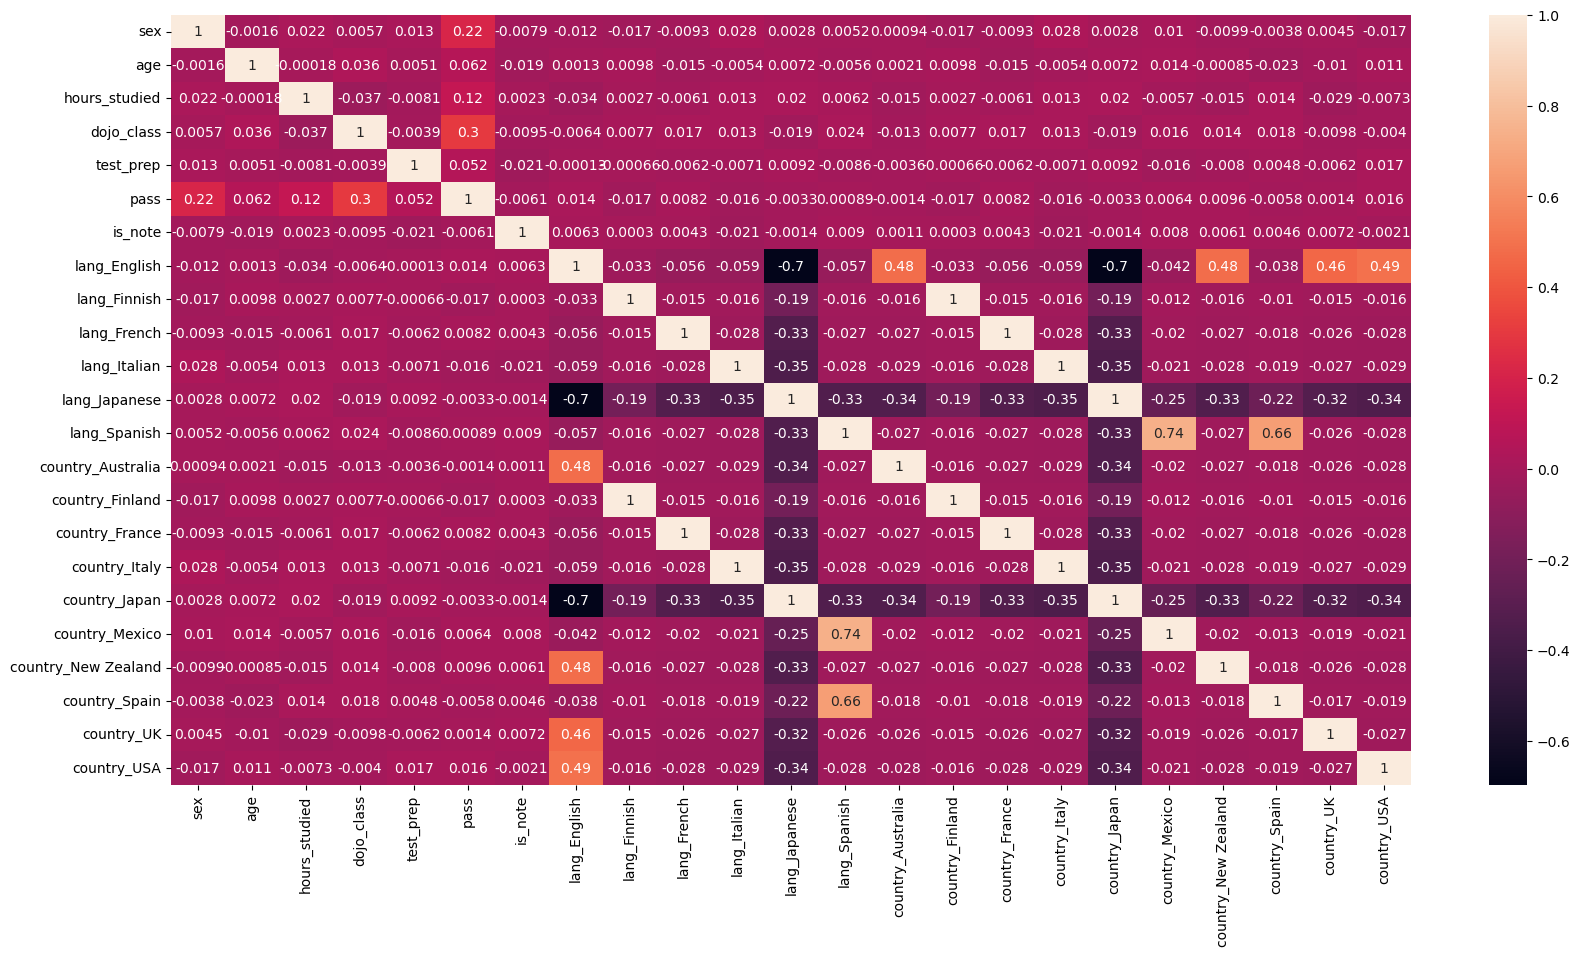

In [31]:
#No co-relation exists
#There are evidences that person from a country chooses his/her native language.
#Students with Country as Japan  don't consider English Language 
#Majority from UK, USA, Australia and New Zealand choose English.
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot = True)


## Imputation

In [32]:
from sklearn.impute import KNNImputer
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer

knn_imputer = KNNImputer(n_neighbors=50)
df_knn = knn_imputer.fit_transform(df)

iterative_imputer = IterativeImputer(random_state=42)
df_iterative = iterative_imputer.fit_transform(df)

In [33]:
df_knn = pd.DataFrame(df_knn)
df_knn.columns = df.columns

df_iterative = pd.DataFrame(df_iterative)
df_iterative.columns = df.columns

In [34]:
#With hours_studied as one of the most important factors, and 40% of the data missing, we need to make sure 
#that there is no data drift.

In [35]:
hours_studies_df = pd.concat([df[['hours_studied']],df_knn[['hours_studied']],df_iterative[['hours_studied']]],axis=1)
hours_studies_df.columns = ['hours_studied','knn_hours_studied','iterative_hours_studied']
hours_studies_df.describe()

,hours_studied,knn_hours_studied,iterative_hours_studied
count,2938.000000,5000.000000,5000.000000
mean,4.692385,4.731295,4.696192
std,2.756274,2.138223,2.125358
min,0.139203,0.139203,0.139203
25%,2.515895,3.622685,3.644880
50%,4.152155,4.639823,4.538022
75%,6.396500,5.486855,5.244672
max,12.812278,12.812278,12.812278


In [36]:
# Separate features and target variable
X = df_knn.drop('pass', axis=1)
y = df_knn['pass']

##### Logistic Regression as Base model - Accuracy 65%

/Users/avinash.c.kumar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/avinash.c.kumar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

Best Hyperparameters: {'C': 10, 'penalty': 'l2'}
Best Mean CV Accuracy: 0.6575


/Users/avinash.c.kumar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/avinash.c.kumar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

Cross-Validation Accuracy Scores: [0.679 0.647 0.652 0.647 0.647]
Mean CV Accuracy: 0.6544000000000001
Accuracy: 0.641
True Positives: 250
True Negatives: 391
False Positives: 117
False Negatives: 242
F1 Score: 0.5820721769499417


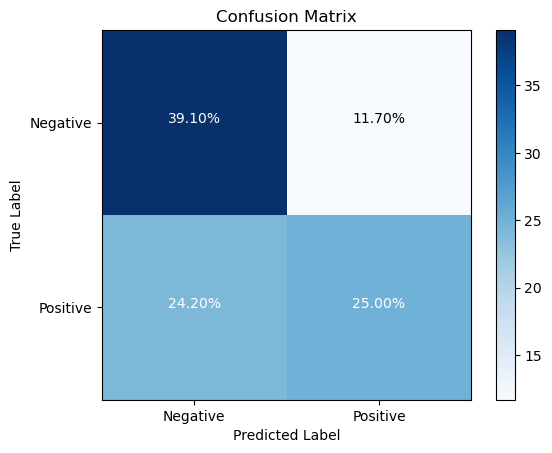

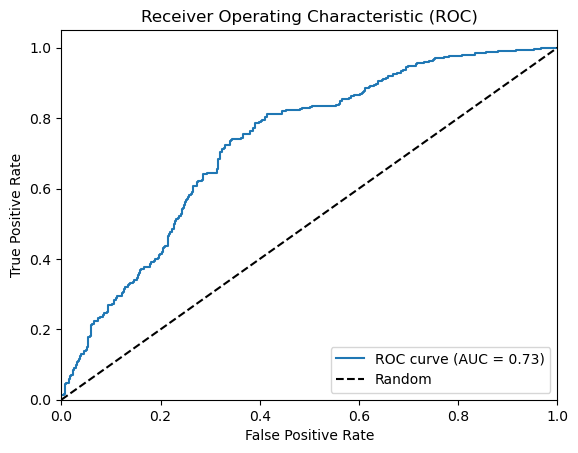

CPU times: user 1.63 s, sys: 1.64 s, total: 3.27 s
Wall time: 1.19 s


In [37]:
%%time
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.metrics import roc_curve, auc

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Logistic Regression classifier
logreg = LogisticRegression()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding mean cross-validation score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Mean CV Accuracy:", grid_search.best_score_)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Perform cross-validation on the best model
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# Evaluate the best model on the testing set
accuracy = best_model.score(X_test, y_test)
print("Accuracy:", accuracy)

# Predict on the testing set using the best model
y_pred = best_model.predict(X_test)

############## Understanding the results with confusion matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Extract TN, FP, FN, TP from confusion matrix
tn, fp, fn, tp = cm.ravel()

# Print the results
print('True Positives:', tp)
print('True Negatives:', tn)
print('False Positives:', fp)
print('False Negatives:', fn)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)

# Print the F1 score
print('F1 Score:', f1)

# Calculate the percentages
cm_sum = np.sum(cm)
cm_percent = cm / cm_sum.astype(float) * 100

# Plot the confusion matrix with percentages
plt.imshow(cm_percent, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Negative', 'Positive'])
plt.yticks(tick_marks, ['Negative', 'Positive'])

# Add the percentage annotations
thresh = cm_percent.max() / 2.0
for i, j in np.ndindex(cm_percent.shape):
    plt.text(j, i, format(cm_percent[i, j], '.2f') + '%',
             horizontalalignment='center',
             color='white' if cm_percent[i, j] > thresh else 'black')

plt.show()

############## Understanding the results with AUC ROC

# Get predicted probabilities for the positive class
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC (Area Under the ROC Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

##### XG boost Model - Accuracy 75%

Best Hyperparameters: {'max_depth': 5, 'n_estimators': 100}
Best Mean CV Accuracy: 0.746
Cross-Validation Accuracy Scores: [0.767 0.75  0.749 0.735 0.745]
Mean CV Accuracy: 0.7492
Accuracy: 0.736
True Positives: 335
True Negatives: 401
False Positives: 107
False Negatives: 157
F1 Score: 0.7173447537473234


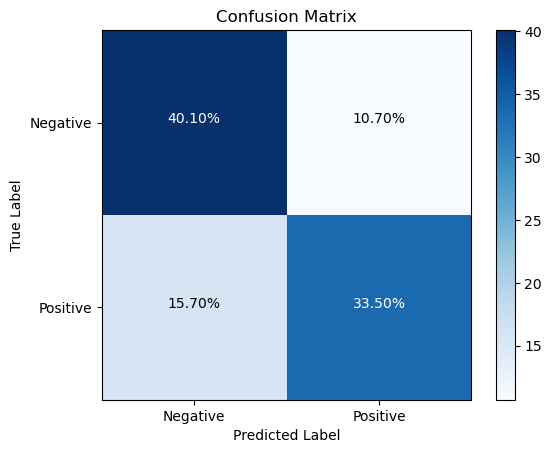

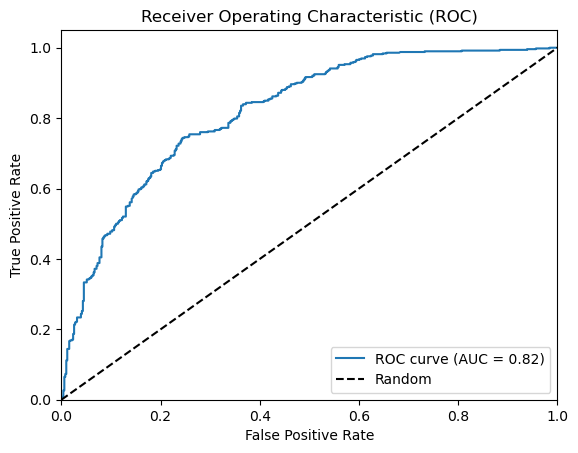

/Users/avinash.c.kumar/opt/anaconda3/lib/python3.9/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/Users/avinash.c.kumar/opt/anaconda3/lib/python3.9/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def delta_min

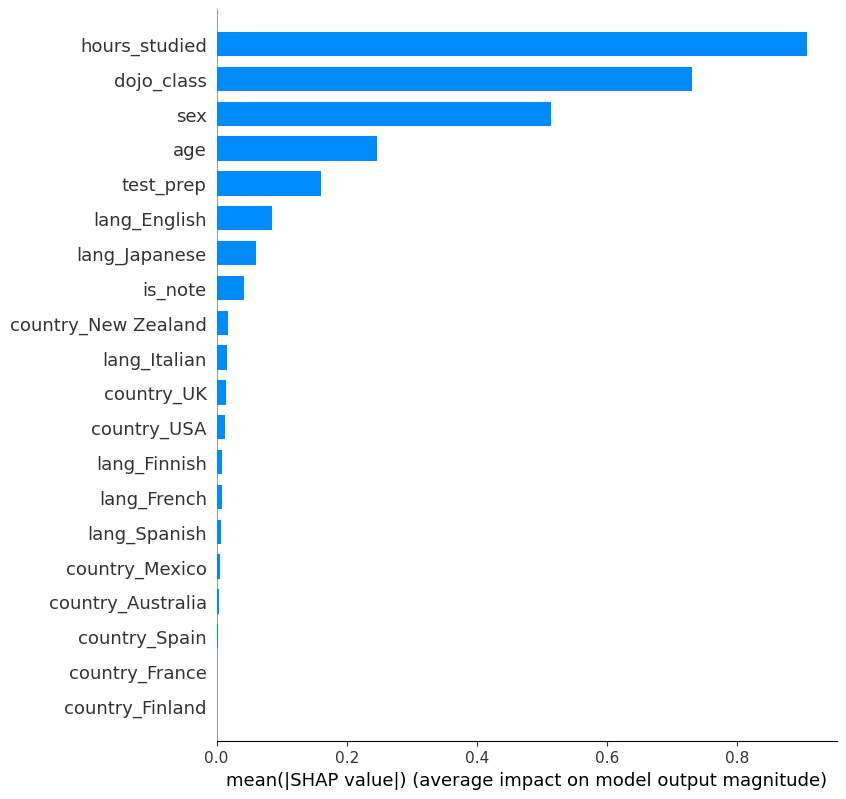

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


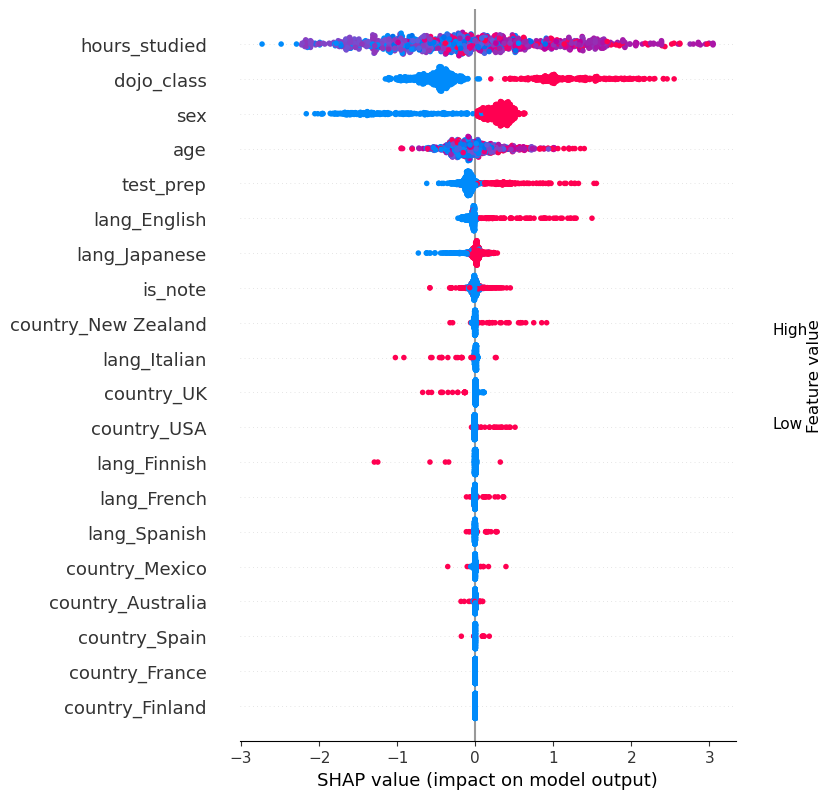

CPU times: user 1min 47s, sys: 19.8 s, total: 2min 7s
Wall time: 27.1 s


In [38]:
%%time 
import xgboost as xgb

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the XGBoost classifier
xgb_clf = xgb.XGBClassifier(objective='binary:logistic')

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(xgb_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding mean cross-validation score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Mean CV Accuracy:", grid_search.best_score_)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Perform cross-validation on the best model
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# Evaluate the best model on the testing set
accuracy = best_model.score(X_test, y_test)
print("Accuracy:", accuracy)

# Predict on the testing set using the best model
y_pred = best_model.predict(X_test)


############## Understanding the results with confusion matrix

from sklearn.metrics import confusion_matrix, classification_report, f1_score

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Extract TN, FP, FN, TP from confusion matrix
tn, fp, fn, tp = cm.ravel()

# Print the results
print('True Positives:', tp)
print('True Negatives:', tn)
print('False Positives:', fp)
print('False Negatives:', fn)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)

# Print the F1 score
print('F1 Score:', f1)

# Calculate the percentages
cm_sum = np.sum(cm)
cm_percent = cm / cm_sum.astype(float) * 100

# Plot the confusion matrix with percentages
plt.imshow(cm_percent, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Negative', 'Positive'])
plt.yticks(tick_marks, ['Negative', 'Positive'])

# Add the percentage annotations
thresh = cm_percent.max() / 2.0
for i, j in np.ndindex(cm_percent.shape):
    plt.text(j, i, format(cm_percent[i, j], '.2f') + '%',
             horizontalalignment='center',
             color='white' if cm_percent[i, j] > thresh else 'black')

plt.show()

############## Understanding the results with AUC ROC
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC (Area Under the ROC Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

############## Understanding the model with SHAP Values
import shap
# Create an explainer object using the best model
explainer = shap.Explainer(best_model)

# Calculate SHAP values for the testing data
shap_values = explainer.shap_values(X_test)

# Plot the SHAP values
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Plot the SHAP values using a beeswarm plot
shap.summary_plot(shap_values, X_test)

#### Remove Sex variable - Accuracy 73%

Removing the column sex because:
- I don't find a justifiable reason that females would fail more than males. It sounds discriminatory.
- Model performance degrades by 2% (which is small).
- I think it is unethical to train model which is biases with gender without any reason.

Best Hyperparameters: {'max_depth': 7, 'n_estimators': 50}
Best Mean CV Accuracy: 0.72675
Cross-Validation Accuracy Scores: [0.775 0.715 0.725 0.696 0.721]
Mean CV Accuracy: 0.7263999999999999
Accuracy: 0.716
True Positives: 332
True Negatives: 384
False Positives: 124
False Negatives: 160
F1 Score: 0.70042194092827


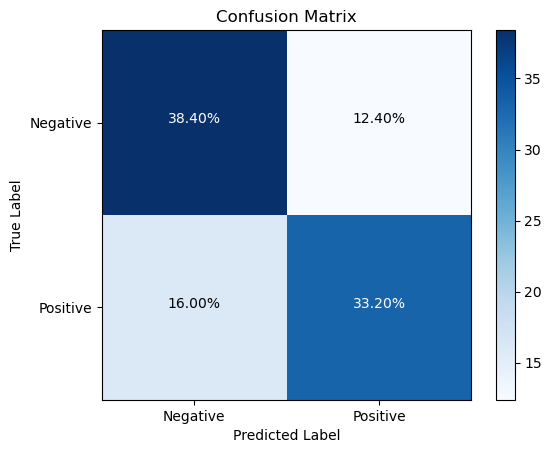

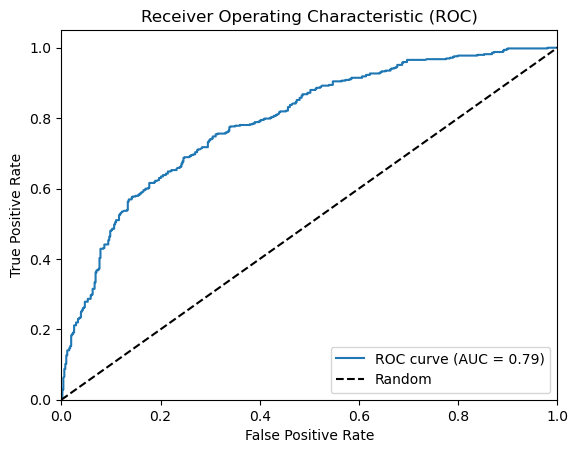

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


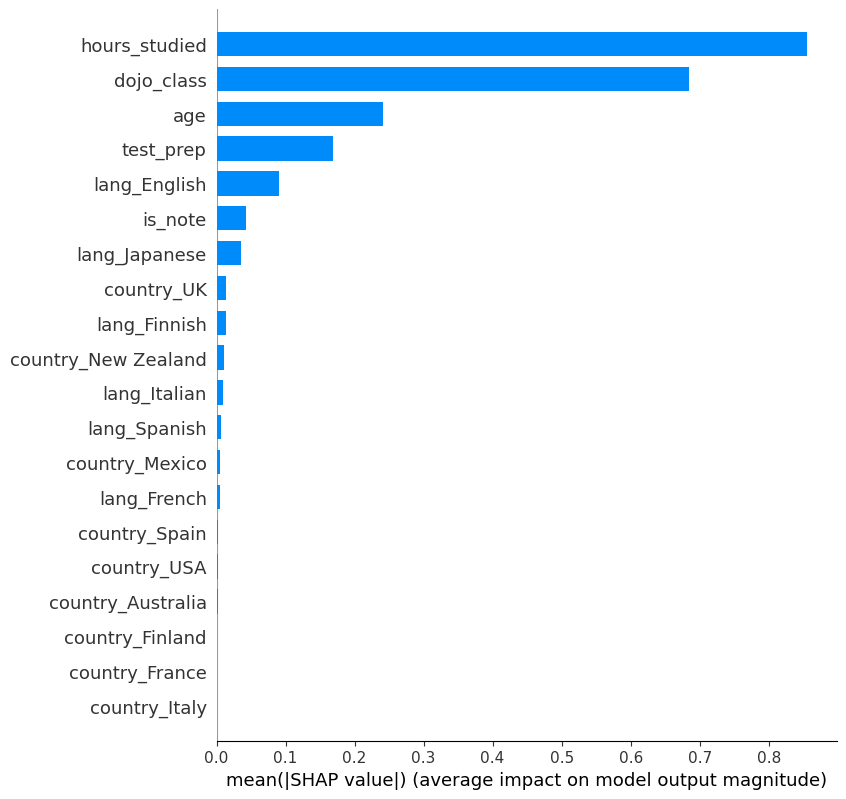

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


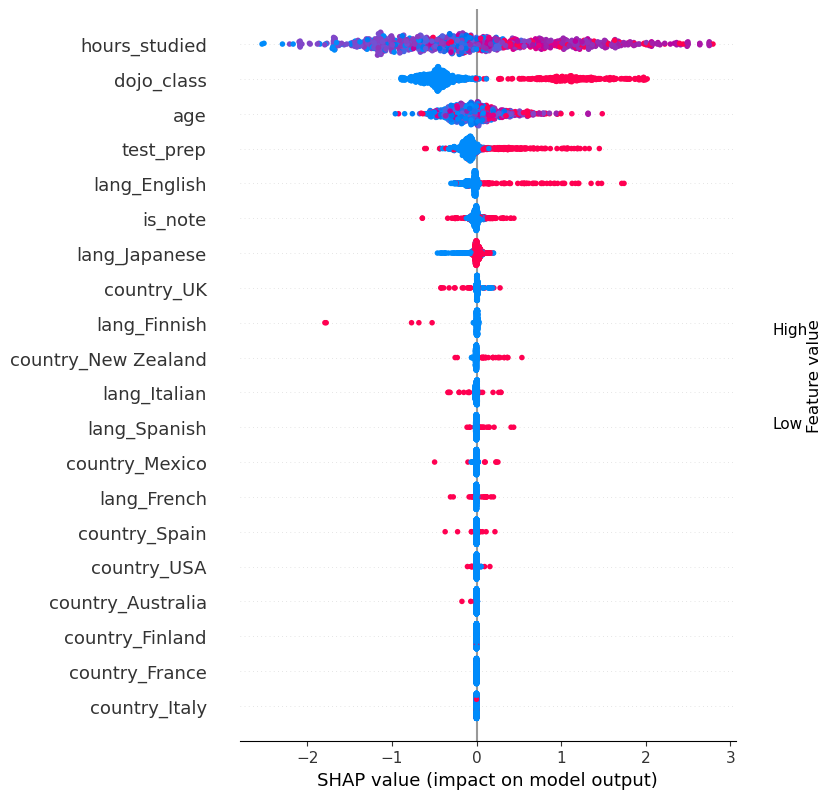

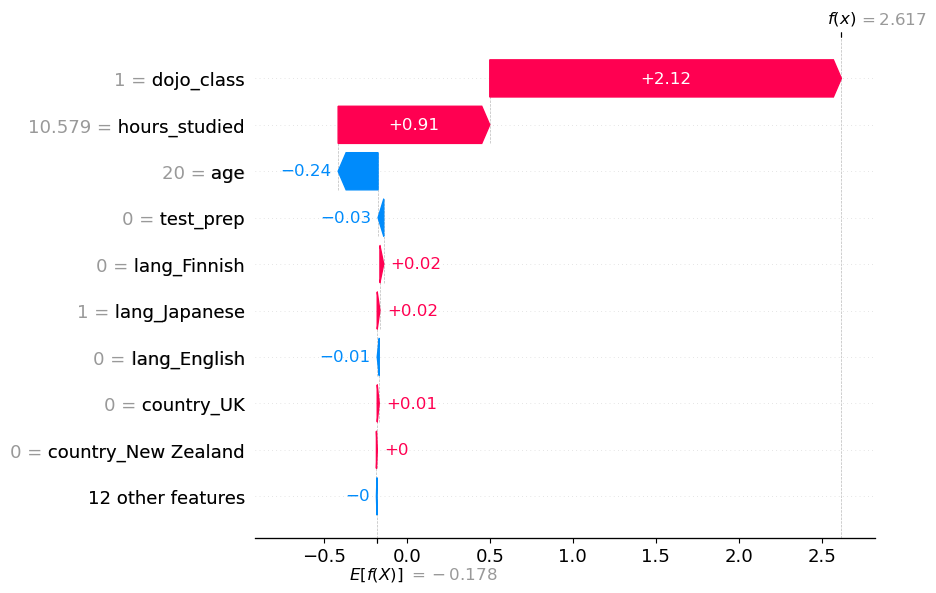

CPU times: user 1min 38s, sys: 18.7 s, total: 1min 57s
Wall time: 23.7 s


In [39]:
%%time 

X = X.drop(columns='sex')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the XGBoost classifier
xgb_clf = xgb.XGBClassifier(objective='binary:logistic')

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(xgb_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding mean cross-validation score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Mean CV Accuracy:", grid_search.best_score_)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Perform cross-validation on the best model
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# Evaluate the best model on the testing set
accuracy = best_model.score(X_test, y_test)
print("Accuracy:", accuracy)

# Predict on the testing set using the best model
y_pred = best_model.predict(X_test)


############## Understanding the results with confusion matrix

from sklearn.metrics import confusion_matrix, classification_report, f1_score

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Extract TN, FP, FN, TP from confusion matrix
tn, fp, fn, tp = cm.ravel()

# Print the results
print('True Positives:', tp)
print('True Negatives:', tn)
print('False Positives:', fp)
print('False Negatives:', fn)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)

# Print the F1 score
print('F1 Score:', f1)

# Calculate the percentages
cm_sum = np.sum(cm)
cm_percent = cm / cm_sum.astype(float) * 100

# Plot the confusion matrix with percentages
plt.imshow(cm_percent, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Negative', 'Positive'])
plt.yticks(tick_marks, ['Negative', 'Positive'])

# Add the percentage annotations
thresh = cm_percent.max() / 2.0
for i, j in np.ndindex(cm_percent.shape):
    plt.text(j, i, format(cm_percent[i, j], '.2f') + '%',
             horizontalalignment='center',
             color='white' if cm_percent[i, j] > thresh else 'black')

plt.show()

############## Understanding the results with AUC ROC
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC (Area Under the ROC Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Create an explainer object using the best model
explainer = shap.Explainer(best_model)

# Calculate SHAP values for the testing data
shap_values = explainer.shap_values(X_test)

# Plot the SHAP values
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Plot the SHAP values using a beeswarm plot
shap.summary_plot(shap_values, X_test)

shap_values = explainer(X)
shap.plots.waterfall(shap_values[0])

In [41]:
shap_values[0]

.values =
array([-2.4038835e-01,  9.1263145e-01,  2.1164274e+00, -3.4158912e-02,
       -4.2579770e-03, -1.2118104e-02,  2.2988534e-02,  1.3140287e-03,
        6.1114086e-05,  1.6341079e-02, -1.3349523e-03,  1.0079777e-05,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        1.3515952e-03,  4.8795762e-03, -5.9616752e-04,  1.2044402e-02,
       -8.6938293e-05], dtype=float32)

.base_values =
-0.17834853

.data =
array([20.        , 10.57859362,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ])